In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Categorical Data

Descriptive statistics of categorical data (or object data type in Python) is interested in counting the frequencies from their levels

Let's consider the following dataset. It has records for three different species of penguins collected from 3 islands in the Palmer Archipelago, Antarctica

In [7]:
df = sns.load_dataset('penguins')
print(df.shape)
df.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We can use `.describe(include='all')` to calculate the descriptives statistics for categorical variables.
* In the examples below we filtered the categorical variables with `.select_dtypes(include='object')`, to focus on categorical data only. But as you have seen in Pandas, it is not an issue to mix numerical and categorical data when using `.describe(include='all')`

It shows the total non-null number of rows for a given column, how many unique levels it has, the most frequent level and its frequency.

In [7]:
df.select_dtypes(include='object').describe(include='all')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In addition, you can count the values for each categorical variable using `.value_counts()` while looping over all categorical variables

In [10]:
for col in df.select_dtypes(include='object').columns:
  print(f"{df[col].value_counts()}  \n\n")

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64  


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64  


sex
Male      168
Female    165
Name: count, dtype: int64  




Finally, we can plot the categorical data in bar plots to visualize the univariate distribution
* You may use the library you feel most comfortable with. In this case, we used Seaborn

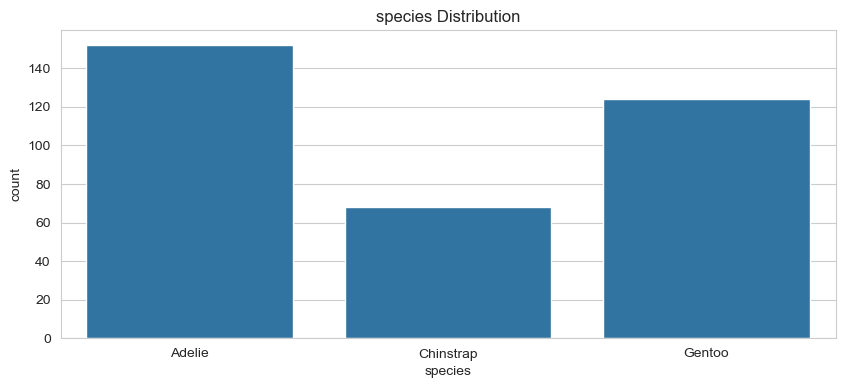

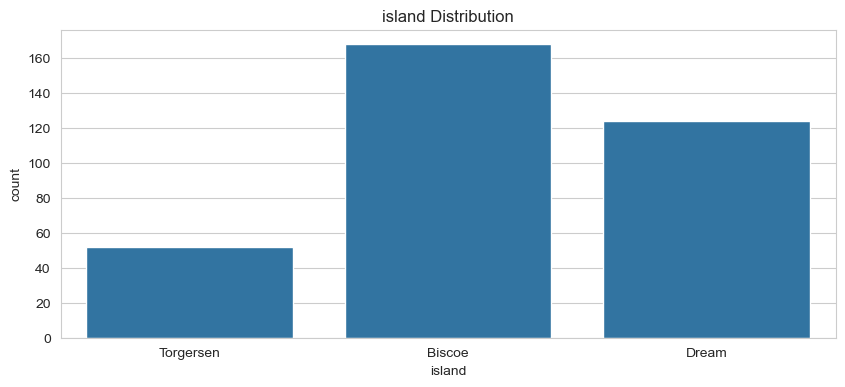

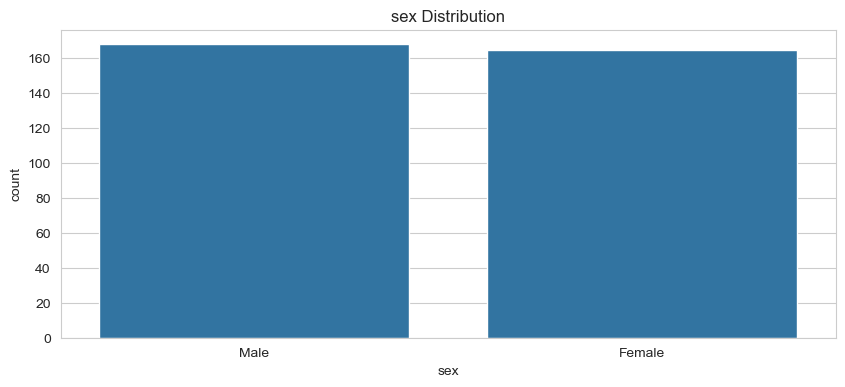

In [13]:
for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(10,4))
  sns.countplot(data=df, x=col)
  plt.title(f"{col} Distribution")
  plt.show()
  print("\n")

### Outliers

Outliers are simply data points that are different from the majority of the data

* Consider the dataset below. It holds records for waiter tips based on the day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were at the table.

In [16]:
df = sns.load_dataset('tips')
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A rule of thumb used to define whether a given data point is an outlier is to determine if that data point is:
* **1** - above Q3 +  1.5 x IQR or 
* **2** - below Q1 - 1.5 x IQR

In the histograms below, you can check if the data is an outlier by checking everything that is **not** in between the **range from `"Q1 - 1.5 IQR" to "Q3 - 1.5 IQR"`**
* We also place the median levels
* You will notice that the outliers in this data set are located more to the right side of the distribution. However, this is just a circumstance; outliers can be on any side of the distribution

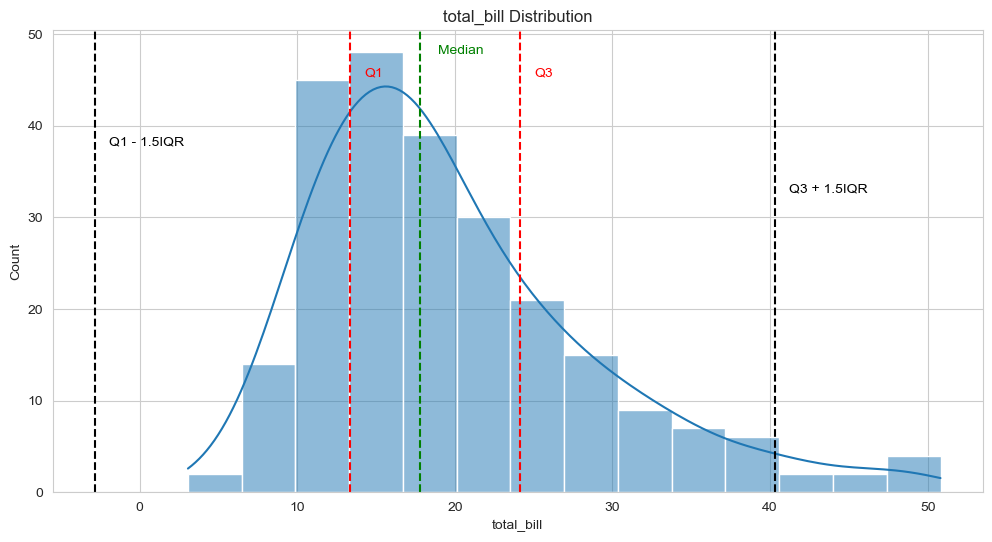

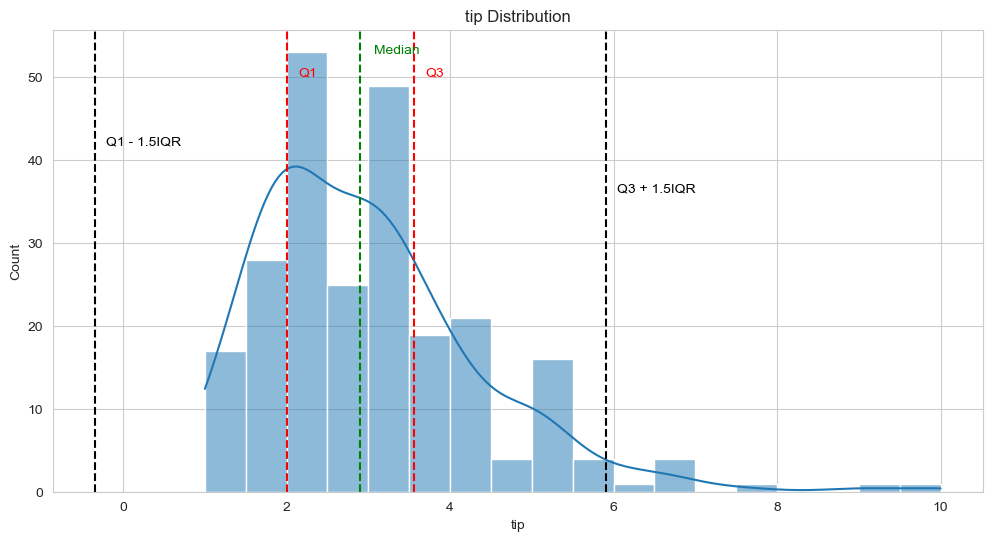

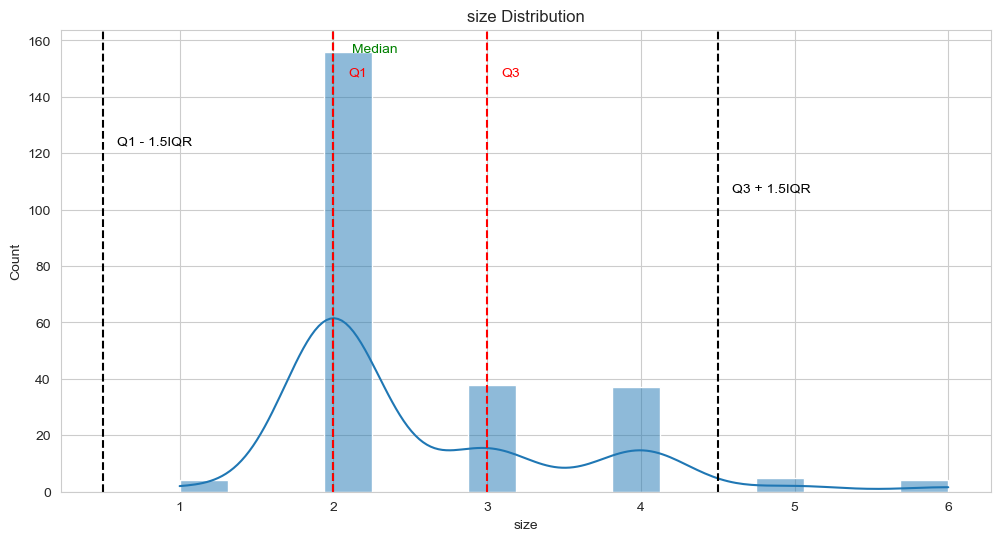

In [19]:
for col in  df.select_dtypes(include='number').columns:

  fig, axes = plt.subplots(figsize=(12,6))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.95, s='Median', fontsize=10, c='g')


  IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)

  plt.axvline(df[col].quantile(q=0.25), color='r', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.25) + df[col].std()/10, y=axes.get_ylim()[1] * 0.90, s="Q1", fontsize=10, c='r')

  plt.axvline(df[col].quantile(q=0.25) - 1.5*IQR, color='k', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.25) - 1.5*IQR + df[col].std()/10, y=axes.get_ylim()[1] * 0.75, s="Q1 - 1.5IQR", fontsize=10, c='k')
  
  plt.axvline(df[col].quantile(q=0.75), color='r', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.75) + df[col].std()/10, y=axes.get_ylim()[1] * 0.90, s="Q3", fontsize=10, c='r')

  plt.axvline(df[col].quantile(q=0.75) + 1.5*IQR, color='k', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.75) + 1.5*IQR + df[col].std()/10, y=axes.get_ylim()[1] * 0.65, s="Q3 + 1.5IQR", fontsize=10, c='k')
  
  plt.show()
  print("\n")

Just a quick recap on a boxplot and its major elements: min, max, median, IQR, and outliers
* Note: you will notice that in the example below, there is no Q1 - 1.5 IQR since there is nothing below this interval. There is only the min value
* On the other side, we find Q3 + 1.5 IQR, the outliers and the max value (which happens to be an outlier)

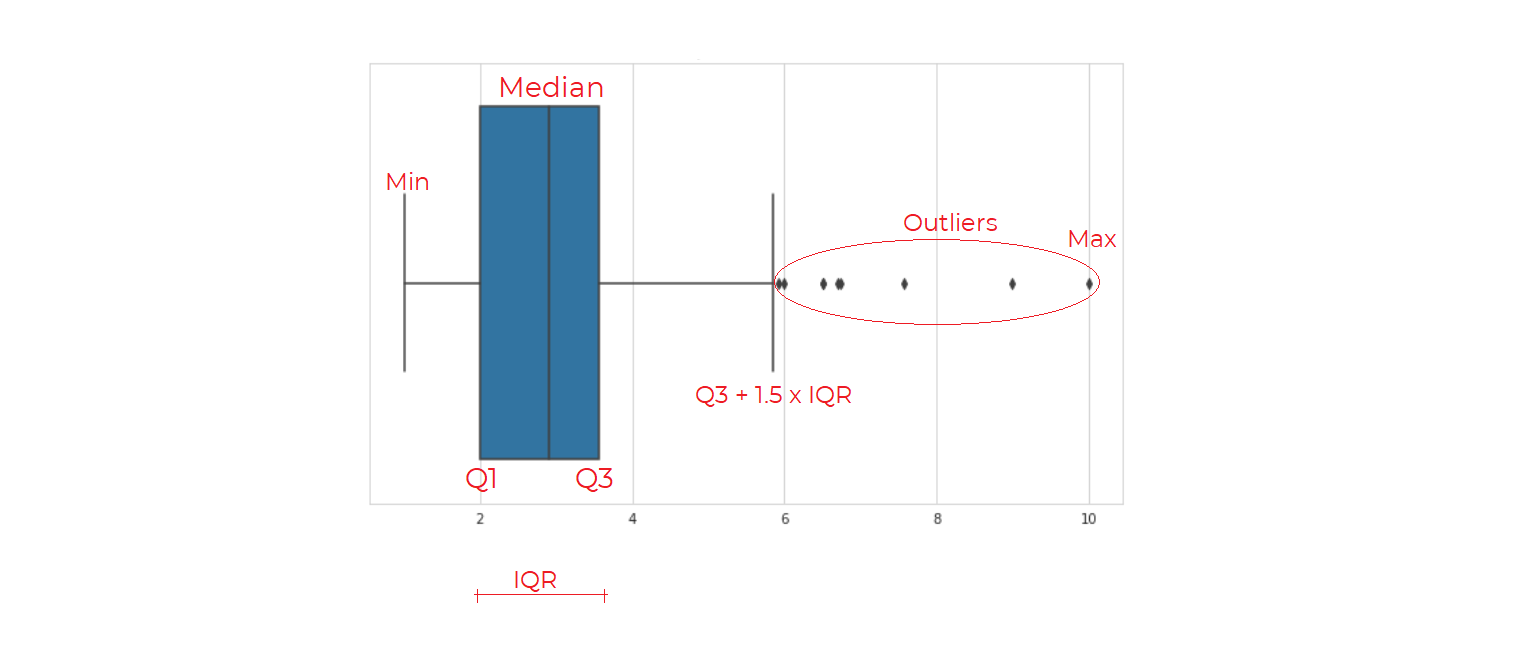

You can check using a box plot and note the outliers marked as points

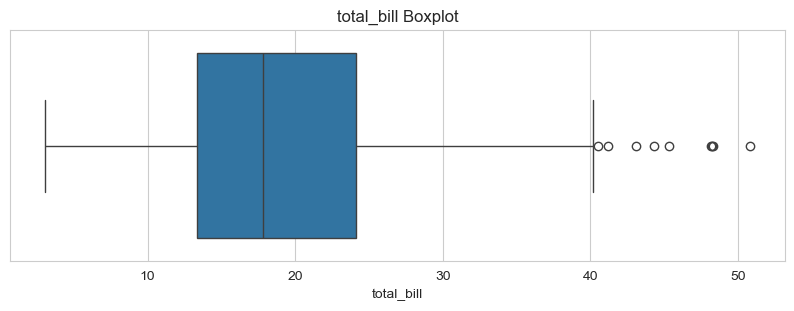

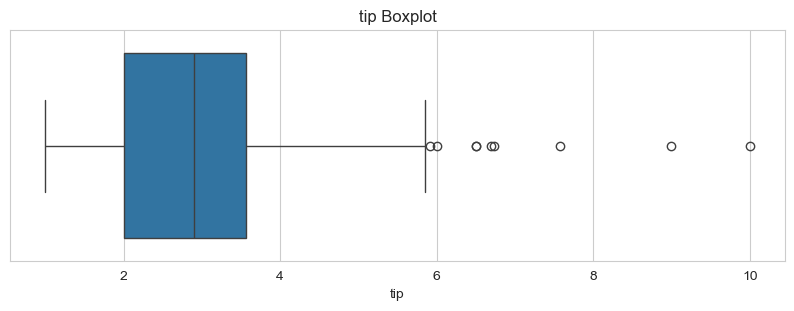

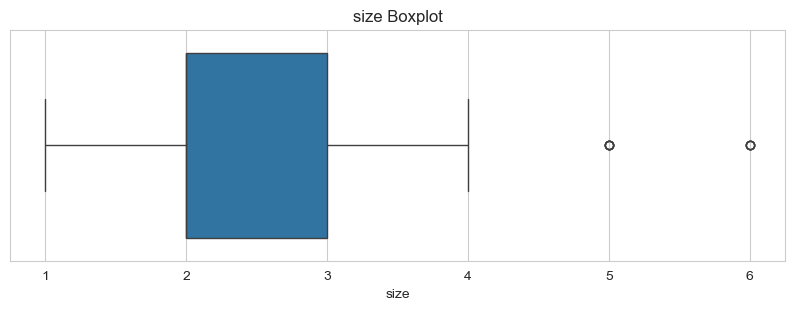

In [26]:
for col in  df.select_dtypes(include='number').columns:
  fig, axes = plt.subplots(figsize=(10,3))
  sns.boxplot(data=df, x=col)

  plt.title(f"{col} Boxplot")
  plt.show()
  print("\n")

Finally, you can combine both boxplots and histograms in a unique way for univariate analysis. It gives you more perspective in one single Figure: you can check the distribution shape and main figures
* We considered the additional `gridspec_kw` argument at `plt.subplots()`, so we could control the proportional size of the Axes in the Figure. In this case, we want the first Axes - box plot - to occupy 15% of the Figure and the second Axes - histogram - to occupy 85% of the Figure

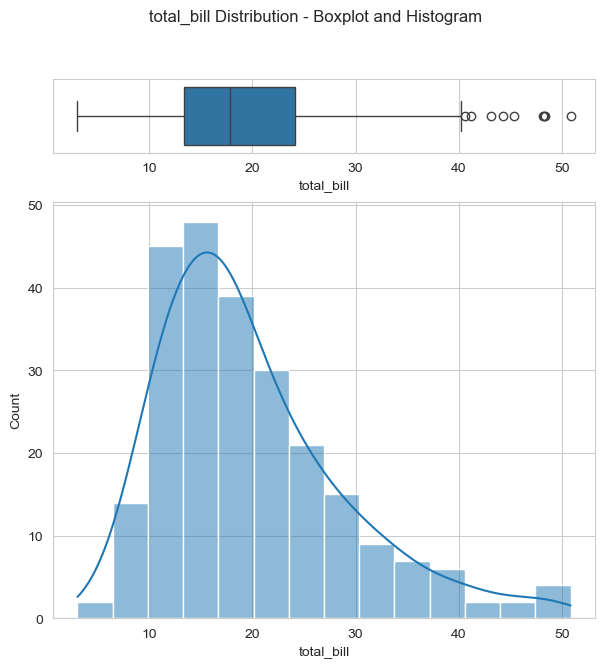

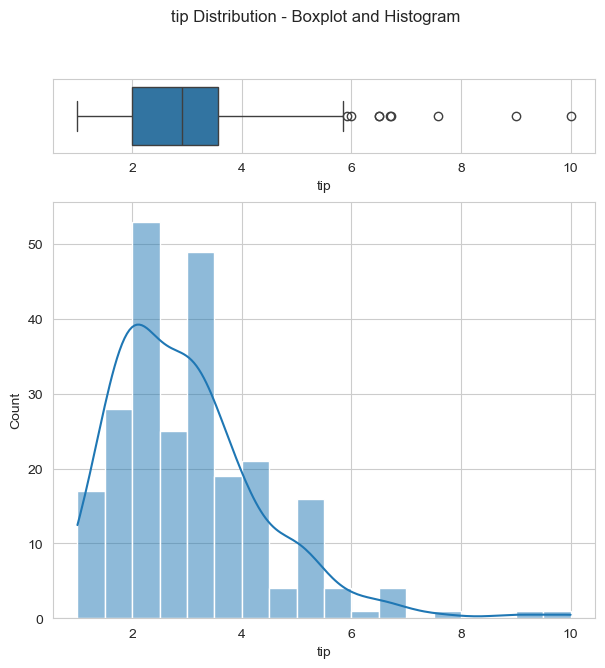

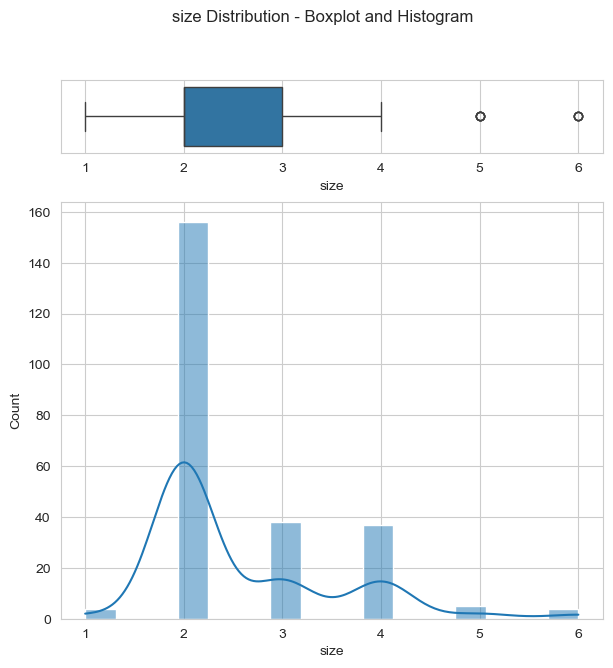

In [29]:
for col in  df.select_dtypes(include='number').columns:
  fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
  sns.boxplot(data=df, x=col, ax=axes[0])
  sns.histplot(data=df, x=col, kde=True, ax=axes[1])
  fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
  plt.show()
  print("\n")

### Summary / Calculate Descriptive Statistics

We combine `.describe()`, .`skew()` and `.kurtosis()` to analyze our numerical and categorical data

* Consider the dataset below. It holds records for waiter tips based on the day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were at the table.

In [19]:
df = sns.load_dataset('tips')
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


You will notice that, naturally, for categorical variables, we don't have skewness and kurtosis

In [17]:
ser_skew = df.skew() # the result is a Pandas Series, which we will append to a DataFrame
ser_skew.name = 'Skewness'

ser_kurt = df.skew() # the result is a Pandas Series, we will append to a DataFrame
ser_kurt.name = 'Kurtosis'

SummaryStats = df.describe(include='all')
SummaryStats = SummaryStats.append(ser_skew).append(ser_kurt)
SummaryStats

TypeError: 'Categorical' with dtype category does not support reduction 'skew'